<div style="line-height:0.45">
<h1 style="color:#26BBEE  ">Decision tree for regression  </h1>
<span style="display: inline-block;">
    <h3 style="color: lightblue; display: inline;">Keywords:</h3> features correlations + NaN values + contextmanager decoratormatplotlib styles
</span>
</div>

In [1]:
import random
import warnings
from contextlib import contextmanager

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [2]:
df = pd.read_csv("../datas/recs2015_public_v4.csv")
df.head()

,DOEID,REGIONC,DIVISION,METROMICRO,UATYP10,TYPEHUQ,ZTYPEHUQ,CELLAR,ZCELLAR,BASEFIN,...,ZELAMOUNT,NGXBTU,PERIODNG,ZNGAMOUNT,FOXBTU,PERIODFO,ZFOAMOUNT,LPXBTU,PERIODLP,ZLPAMOUNT
0,10001,4,10,METRO,U,2,0,0,0,-2,...,0,103.32,1,0,137.45,-2,-2,91.33,-2,-2
1,10002,3,7,NONE,R,2,0,0,0,-2,...,1,NaN,-2,-2,137.45,-2,-2,91.33,-2,-2
2,10003,3,6,METRO,U,2,0,1,0,1,...,0,100.14,1,0,137.45,-2,-2,91.33,-2,-2
3,10004,2,4,MICRO,C,2,0,1,0,1,...,0,NaN,-2,-2,137.45,-2,-2,91.33,2,0
4,10005,1,2,METRO,U,2,0,1,0,0,...,0,102.83,1,0,137.45,-2,-2,91.33,-2,-2


In [3]:
print("Number of columns:", df.shape[1])
print("Number of rows: ", df.shape[0])

Number of columns: 759
Number of rows:  5686


In [4]:
df.describe()

,DOEID,REGIONC,DIVISION,TYPEHUQ,ZTYPEHUQ,CELLAR,ZCELLAR,BASEFIN,ZBASEFIN,ATTIC,...,ZELAMOUNT,NGXBTU,PERIODNG,ZNGAMOUNT,FOXBTU,PERIODFO,ZFOAMOUNT,LPXBTU,PERIODLP,ZLPAMOUNT
count,5686.000000,5686.000000,5686.000000,5686.000000,5686.0,5686.000000,5686.000000,5686.000000,5686.000000,5686.000000,...,5686.000000,3304.000000,5686.000000,5686.000000,5686.000000,5686.000000,5686.000000,5.686000e+03,5686.000000,5686.000000
mean,12843.500000,2.760816,5.670243,2.596025,0.0,-0.205593,-0.505276,-1.199261,-1.381815,-0.111854,...,0.109040,100.088868,0.181674,-0.731094,137.441423,-1.738305,-1.872318,9.133000e+01,-1.479071,-1.748505
std,1641.551147,1.004187,2.842655,1.164641,0.0,1.134775,0.880288,1.235166,0.933693,1.187953,...,0.311716,4.437933,2.197037,1.117215,0.142739,1.197667,0.558504,5.230054e-12,1.663040,0.767910
min,10001.000000,1.000000,1.000000,1.000000,0.0,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,0.000000,83.340000,-2.000000,-2.000000,135.000000,-2.000000,-2.000000,9.133000e+01,-2.000000,-2.000000
25%,11422.250000,2.000000,3.000000,2.000000,0.0,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,0.000000,99.050000,-2.000000,-2.000000,137.450000,-2.000000,-2.000000,9.133000e+01,-2.000000,-2.000000
50%,12843.500000,3.000000,5.000000,2.000000,0.0,0.000000,0.000000,-2.000000,-2.000000,0.000000,...,0.000000,101.145000,1.000000,0.000000,137.450000,-2.000000,-2.000000,9.133000e+01,-2.000000,-2.000000
75%,14264.750000,4.000000,8.000000,3.000000,0.0,1.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,102.780000,1.000000,0.000000,137.450000,-2.000000,-2.000000,9.133000e+01,-2.000000,-2.000000
max,15686.000000,4.000000,10.000000,5.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,107.720000,5.000000,1.000000,137.450000,5.000000,1.000000,9.133000e+01,5.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5686 entries, 0 to 5685
Columns: 759 entries, DOEID to ZLPAMOUNT
dtypes: float64(262), int64(493), object(4)
memory usage: 32.9+ MB


In [6]:
## Show all the rows and columns
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None)

# Look for NaNs values in each column
df.isnull().sum()

DOEID                    0
REGIONC                  0
DIVISION                 0
METROMICRO               0
UATYP10                  0
TYPEHUQ                  0
ZTYPEHUQ                 0
CELLAR                   0
ZCELLAR                  0
BASEFIN                  0
ZBASEFIN                 0
ATTIC                    0
ZATTIC                   0
ATTICFIN                 0
ZATTICFIN                0
STORIES                  0
ZSTORIES                 0
PRKGPLC1                 0
ZPRKGPLC1                0
SIZEOFGARAGE             0
ZSIZEOFGARAGE            0
KOWNRENT                 0
ZKOWNRENT                0
YEARMADERANGE            0
ZYEARMADERANGE           0
OCCUPYYRANGE             0
ZOCCUPYYRANGE            0
STUDIO                   0
ZSTUDIO                  0
BEDROOMS                 0
ZBEDROOMS                0
NCOMBATH                 0
ZNCOMBATH                0
NHAFBATH                 0
ZNHAFBATH                0
OTHROOMS                 0
ZOTHROOMS                0
T

In [7]:
# Check missing values in NGXBTU column
df['NGXBTU'].isnull().sum()

2382

In [8]:
df = df.drop(['DOEID'], axis=1)
df.head()

,REGIONC,DIVISION,METROMICRO,UATYP10,TYPEHUQ,ZTYPEHUQ,CELLAR,ZCELLAR,BASEFIN,ZBASEFIN,ATTIC,ZATTIC,ATTICFIN,ZATTICFIN,STORIES,ZSTORIES,PRKGPLC1,ZPRKGPLC1,SIZEOFGARAGE,ZSIZEOFGARAGE,KOWNRENT,ZKOWNRENT,YEARMADERANGE,ZYEARMADERANGE,OCCUPYYRANGE,ZOCCUPYYRANGE,STUDIO,ZSTUDIO,BEDROOMS,ZBEDROOMS,NCOMBATH,ZNCOMBATH,NHAFBATH,ZNHAFBATH,OTHROOMS,ZOTHROOMS,TOTROOMS,ZTOTROOMS,WALLTYPE,ZWALLTYPE,ROOFTYPE,ZROOFTYPE,HIGHCEIL,ZHIGHCEIL,DOOR1SUM,ZDOOR1SUM,WINDOWS,ZWINDOWS,TYPEGLASS,ZTYPEGLASS,WINFRAME,ZWINFRAME,ADQINSUL,ZADQINSUL,DRAFTY,ZDRAFTY,UGASHERE,ZUGASHERE,SWIMPOOL,ZSWIMPOOL,MONPOOL,ZMONPOOL,POOL,ZPOOL,FUELPOOL,ZFUELPOOL,RECBATH,ZRECBATH,MONTUB,ZMONTUB,FUELTUB,ZFUELTUB,OUTLET,ZOUTLET,ALTFUELPEV,ZALTFUELPEV,BACKUP,ZBACKUP,SOLAR,NUMFRIG,ZNUMFRIG,SIZRFRI1,ZSIZRFRI1,TYPERFR1,ZTYPERFR1,AGERFRI1,ZAGERFRI1,ICE,ZICE,SIZRFRI2,ZSIZRFRI2,TYPERFR2,ZTYPERFR2,AGERFRI2,ZAGERFRI2,LOCRFRI2,ZLOCRFRI2,NUMFREEZ,ZNUMFREEZ,UPRTFRZR,ZUPRTFRZR,SIZFREEZ,ZSIZFREEZ,AGEFRZR,ZAGEFRZR,STOVEN,ZSTOVEN,STOVENFUEL,ZSTOVENFUEL,DUALCOOKTFUEL,ZDUALCOOKTFUEL,DUALOVENFUEL,ZDUALOVENFUEL,COOKTUSE,ZCOOKTUSE,OVENUSE,ZOVENUSE,STOVE,ZSTOVE,STOVEFUEL,ZSTOVEFUEL,SEPCOOKTUSE,ZSEPCOOKTUSE,OVEN,ZOVEN,OVENFUEL,ZOVENFUEL,SEPOVENUSE,ZSEPOVENUSE,MICRO,ZMICRO,AMTMICRO,ZAMTMICRO,OUTGRILL,ZOUTGRILL,OUTGRILLFUEL,ZOUTGRILLFUEL,NUMMEAL,ZNUMMEAL,TOAST,ZTOAST,TOASTOVN,ZTOASTOVN,COFFEE,ZCOFFEE,CROCKPOT,ZCROCKPOT,FOODPROC,ZFOODPROC,RICECOOK,ZRICECOOK,BLENDER,ZBLENDER,APPOTHER,ZAPPOTHER,DISHWASH,ZDISHWASH,DWASHUSE,ZDWASHUSE,DWCYCLE,ZDWCYCLE,AGEDW,ZAGEDW,CWASHER,ZCWASHER,TOPFRONT,ZTOPFRONT,WASHLOAD,ZWASHLOAD,WASHTEMP,ZWASHTEMP,RNSETEMP,ZRNSETEMP,AGECWASH,ZAGECWASH,DRYER,ZDRYER,DRYRFUEL,ZDRYRFUEL,DRYRUSE,ZDRYRUSE,AGECDRYER,ZAGECDRYER,TVCOLOR,ZTVCOLOR,TVSIZE1,ZTVSIZE1,TVTYPE1,ZTVTYPE1,TVONWD1,ZTVONWD1,TVONWE1,ZTVONWE1,TVSIZE2,ZTVSIZE2,TVTYPE2,ZTVTYPE2,TVONWD2,ZTVONWD2,TVONWE2,ZTVONWE2,CABLESAT,ZCABLESAT,COMBODVR,ZCOMBODVR,SEPDVR,ZSEPDVR,PLAYSTA,ZPLAYSTA,DVD,ZDVD,VCR,ZVCR,INTSTREAM,ZINTSTREAM,TVAUDIOSYS,ZTVAUDIOSYS,DESKTOP,ZDESKTOP,NUMLAPTOP,ZNUMLAPTOP,NUMTABLET,ZNUMTABLET,ELPERIPH,ZELPERIPH,NUMSMPHONE,ZNUMSMPHONE,CELLPHONE,ZCELLPHONE,INTERNET,ZINTERNET,INWIRELESS,ZINWIRELESS,HEATHOME,ZHEATHOME,DNTHEAT,ZDNTHEAT,EQUIPM,ZEQUIPM,FUELHEAT,ZFUELHEAT,EQUIPAGE,ZEQUIPAGE,THERMAIN,ZTHERMAIN,PROTHERM,ZPROTHERM,EQUIPMUSE,ZEQUIPMUSE,TEMPHOME,ZTEMPHOME,TEMPGONE,ZTEMPGONE,TEMPNITE,ZTEMPNITE,EQUIPAUX,ZEQUIPAUX,EQUIPAUXTYPE,ZEQUIPAUXTYPE,FUELAUX,ZFUELAUX,BASEHEAT,ZBASEHEAT,ATTCHEAT,ZATTCHEAT,GARGHEAT,ZGARGHEAT,MOISTURE,ZMOISTURE,USEMOISTURE,ZUSEMOISTURE,AIRCOND,ZAIRCOND,COOLTYPE,ZCOOLTYPE,CENACHP,ZCENACHP,AGECENAC,ZAGECENAC,THERMAINAC,ZTHERMAINAC,PROTHERMAC,ZPROTHERMAC,USECENAC,ZUSECENAC,NUMBERAC,ZNUMBERAC,WWACAGE,ZWWACAGE,USEWWAC,ZUSEWWAC,TEMPHOMEAC,ZTEMPHOMEAC,TEMPGONEAC,ZTEMPGONEAC,TEMPNITEAC,ZTEMPNITEAC,BASECOOL,ZBASECOOL,ATTCCOOL,ZATTCCOOL,GARGCOOL,ZGARGCOOL,SWAMPCOL,ZSWAMPCOL,NUMCFAN,ZNUMCFAN,NUMFLOORFAN,ZNUMFLOORFAN,NUMWHOLEFAN,ZNUMWHOLEFAN,NUMATTICFAN,ZNUMATTICFAN,NOTMOIST,ZNOTMOIST,USENOTMOIST,ZUSENOTMOIST,FUELH2O,ZFUELH2O,H2OHEATAPT,ZH2OHEATAPT,WHEATAGE,ZWHEATAGE,WHEATSIZ,ZWHEATSIZ,MORETHAN1H2O,ZMORETHAN1H2O,FUELH2O2,ZFUELH2O2,LGTINNUM,ZLGTINNUM,LGTIN4,ZLGTIN4,LGTINCAN,ZLGTINCAN,LGTINCFL,ZLGTINCFL,LGTINLED,ZLGTINLED,LGTINCNTL,ZLGTINCNTL,LGTOUTNUM,ZLGTOUTNUM,LGTOUTCNTL,ZLGTOUTCNTL,AUDIT,AUDITCHG,EELIGHTS,FREEAUDIT,REBATEAPP,RECYCAPP,TAXCREDITAPP,BENOTHER,ESCWASH,ESDISHW,ESDRYER,ESFREEZE,ESFRIG,ESLIGHT,ESWATER,ESWIN,SMARTTHERM,ELPAY,ZELPAY,NGPAY,ZNGPAY,LPGPAY,ZLPGPAY,FOPAY,ZFOPAY,SMARTMETER,INTDATA,INTDATAACC,HHSEX,ZHHSEX,HHAGE,ZHHAGE,EMPLOYHH,ZEMPLOYHH,SDESCENT,ZSDESCENT,HOUSEHOLDER_RACE,ZHOUSEHOLDER_RACE,EDUCATION,ZEDUCATION,NHSLDMEM,ZNHSLDMEM,NUMADULT,ZNUMADULT,NUMCHILD,ZNUMCHILD,ATHOME,ZATHOME,MONEYPY,ZMONEYPY,ENERGYASST,ZENERGYASST,ENERGYASST11,ZENERGYASST11,ENERGYASST12,ZENERGYASST12,ENERGYASST13,ZENERGYASST13,ENERGYASST14,ZENERGYASST14,ENERGYASST15,ZENERGYASST15,ENERGYASSTOTH,ZENERGYASSTOTH,SCALEB,ZSCALEB,SCALEG,ZSCALEG,SCALEE,ZSCALEE,PAYHELP,ZPAYHELP,NOHEATBROKE,ZNOHEATBROKE,NOHEATEL,ZNOHEATEL,NOHEATNG,ZN

In [9]:
# Search for categorical features with strings values 
categorical_columns = df.select_dtypes(include=['object']).columns
print(categorical_columns)

Index(['METROMICRO', 'UATYP10', 'CLIMATE_REGION_PUB', 'IECC_CLIMATE_PUB'], dtype='object')


In [10]:
labe = LabelEncoder()
df['METROMICRO'] = labe.fit_transform(df['METROMICRO'])
df['UATYP10'] = labe.fit_transform(df['UATYP10'])
df['CLIMATE_REGION_PUB'] = labe.fit_transform(df['CLIMATE_REGION_PUB'])
df['IECC_CLIMATE_PUB'] = labe.fit_transform(df['IECC_CLIMATE_PUB'])

In [11]:
# Check again if there are categorical features
categorical_columns = df.select_dtypes(include=['object']).columns
print(categorical_columns)

Index([], dtype='object')


In [12]:
df[:20]

,REGIONC,DIVISION,METROMICRO,UATYP10,TYPEHUQ,ZTYPEHUQ,CELLAR,ZCELLAR,BASEFIN,ZBASEFIN,ATTIC,ZATTIC,ATTICFIN,ZATTICFIN,STORIES,ZSTORIES,PRKGPLC1,ZPRKGPLC1,SIZEOFGARAGE,ZSIZEOFGARAGE,KOWNRENT,ZKOWNRENT,YEARMADERANGE,ZYEARMADERANGE,OCCUPYYRANGE,ZOCCUPYYRANGE,STUDIO,ZSTUDIO,BEDROOMS,ZBEDROOMS,NCOMBATH,ZNCOMBATH,NHAFBATH,ZNHAFBATH,OTHROOMS,ZOTHROOMS,TOTROOMS,ZTOTROOMS,WALLTYPE,ZWALLTYPE,ROOFTYPE,ZROOFTYPE,HIGHCEIL,ZHIGHCEIL,DOOR1SUM,ZDOOR1SUM,WINDOWS,ZWINDOWS,TYPEGLASS,ZTYPEGLASS,WINFRAME,ZWINFRAME,ADQINSUL,ZADQINSUL,DRAFTY,ZDRAFTY,UGASHERE,ZUGASHERE,SWIMPOOL,ZSWIMPOOL,MONPOOL,ZMONPOOL,POOL,ZPOOL,FUELPOOL,ZFUELPOOL,RECBATH,ZRECBATH,MONTUB,ZMONTUB,FUELTUB,ZFUELTUB,OUTLET,ZOUTLET,ALTFUELPEV,ZALTFUELPEV,BACKUP,ZBACKUP,SOLAR,NUMFRIG,ZNUMFRIG,SIZRFRI1,ZSIZRFRI1,TYPERFR1,ZTYPERFR1,AGERFRI1,ZAGERFRI1,ICE,ZICE,SIZRFRI2,ZSIZRFRI2,TYPERFR2,ZTYPERFR2,AGERFRI2,ZAGERFRI2,LOCRFRI2,ZLOCRFRI2,NUMFREEZ,ZNUMFREEZ,UPRTFRZR,ZUPRTFRZR,SIZFREEZ,ZSIZFREEZ,AGEFRZR,ZAGEFRZR,STOVEN,ZSTOVEN,STOVENFUEL,ZSTOVENFUEL,DUALCOOKTFUEL,ZDUALCOOKTFUEL,DUALOVENFUEL,ZDUALOVENFUEL,COOKTUSE,ZCOOKTUSE,OVENUSE,ZOVENUSE,STOVE,ZSTOVE,STOVEFUEL,ZSTOVEFUEL,SEPCOOKTUSE,ZSEPCOOKTUSE,OVEN,ZOVEN,OVENFUEL,ZOVENFUEL,SEPOVENUSE,ZSEPOVENUSE,MICRO,ZMICRO,AMTMICRO,ZAMTMICRO,OUTGRILL,ZOUTGRILL,OUTGRILLFUEL,ZOUTGRILLFUEL,NUMMEAL,ZNUMMEAL,TOAST,ZTOAST,TOASTOVN,ZTOASTOVN,COFFEE,ZCOFFEE,CROCKPOT,ZCROCKPOT,FOODPROC,ZFOODPROC,RICECOOK,ZRICECOOK,BLENDER,ZBLENDER,APPOTHER,ZAPPOTHER,DISHWASH,ZDISHWASH,DWASHUSE,ZDWASHUSE,DWCYCLE,ZDWCYCLE,AGEDW,ZAGEDW,CWASHER,ZCWASHER,TOPFRONT,ZTOPFRONT,WASHLOAD,ZWASHLOAD,WASHTEMP,ZWASHTEMP,RNSETEMP,ZRNSETEMP,AGECWASH,ZAGECWASH,DRYER,ZDRYER,DRYRFUEL,ZDRYRFUEL,DRYRUSE,ZDRYRUSE,AGECDRYER,ZAGECDRYER,TVCOLOR,ZTVCOLOR,TVSIZE1,ZTVSIZE1,TVTYPE1,ZTVTYPE1,TVONWD1,ZTVONWD1,TVONWE1,ZTVONWE1,TVSIZE2,ZTVSIZE2,TVTYPE2,ZTVTYPE2,TVONWD2,ZTVONWD2,TVONWE2,ZTVONWE2,CABLESAT,ZCABLESAT,COMBODVR,ZCOMBODVR,SEPDVR,ZSEPDVR,PLAYSTA,ZPLAYSTA,DVD,ZDVD,VCR,ZVCR,INTSTREAM,ZINTSTREAM,TVAUDIOSYS,ZTVAUDIOSYS,DESKTOP,ZDESKTOP,NUMLAPTOP,ZNUMLAPTOP,NUMTABLET,ZNUMTABLET,ELPERIPH,ZELPERIPH,NUMSMPHONE,ZNUMSMPHONE,CELLPHONE,ZCELLPHONE,INTERNET,ZINTERNET,INWIRELESS,ZINWIRELESS,HEATHOME,ZHEATHOME,DNTHEAT,ZDNTHEAT,EQUIPM,ZEQUIPM,FUELHEAT,ZFUELHEAT,EQUIPAGE,ZEQUIPAGE,THERMAIN,ZTHERMAIN,PROTHERM,ZPROTHERM,EQUIPMUSE,ZEQUIPMUSE,TEMPHOME,ZTEMPHOME,TEMPGONE,ZTEMPGONE,TEMPNITE,ZTEMPNITE,EQUIPAUX,ZEQUIPAUX,EQUIPAUXTYPE,ZEQUIPAUXTYPE,FUELAUX,ZFUELAUX,BASEHEAT,ZBASEHEAT,ATTCHEAT,ZATTCHEAT,GARGHEAT,ZGARGHEAT,MOISTURE,ZMOISTURE,USEMOISTURE,ZUSEMOISTURE,AIRCOND,ZAIRCOND,COOLTYPE,ZCOOLTYPE,CENACHP,ZCENACHP,AGECENAC,ZAGECENAC,THERMAINAC,ZTHERMAINAC,PROTHERMAC,ZPROTHERMAC,USECENAC,ZUSECENAC,NUMBERAC,ZNUMBERAC,WWACAGE,ZWWACAGE,USEWWAC,ZUSEWWAC,TEMPHOMEAC,ZTEMPHOMEAC,TEMPGONEAC,ZTEMPGONEAC,TEMPNITEAC,ZTEMPNITEAC,BASECOOL,ZBASECOOL,ATTCCOOL,ZATTCCOOL,GARGCOOL,ZGARGCOOL,SWAMPCOL,ZSWAMPCOL,NUMCFAN,ZNUMCFAN,NUMFLOORFAN,ZNUMFLOORFAN,NUMWHOLEFAN,ZNUMWHOLEFAN,NUMATTICFAN,ZNUMATTICFAN,NOTMOIST,ZNOTMOIST,USENOTMOIST,ZUSENOTMOIST,FUELH2O,ZFUELH2O,H2OHEATAPT,ZH2OHEATAPT,WHEATAGE,ZWHEATAGE,WHEATSIZ,ZWHEATSIZ,MORETHAN1H2O,ZMORETHAN1H2O,FUELH2O2,ZFUELH2O2,LGTINNUM,ZLGTINNUM,LGTIN4,ZLGTIN4,LGTINCAN,ZLGTINCAN,LGTINCFL,ZLGTINCFL,LGTINLED,ZLGTINLED,LGTINCNTL,ZLGTINCNTL,LGTOUTNUM,ZLGTOUTNUM,LGTOUTCNTL,ZLGTOUTCNTL,AUDIT,AUDITCHG,EELIGHTS,FREEAUDIT,REBATEAPP,RECYCAPP,TAXCREDITAPP,BENOTHER,ESCWASH,ESDISHW,ESDRYER,ESFREEZE,ESFRIG,ESLIGHT,ESWATER,ESWIN,SMARTTHERM,ELPAY,ZELPAY,NGPAY,ZNGPAY,LPGPAY,ZLPGPAY,FOPAY,ZFOPAY,SMARTMETER,INTDATA,INTDATAACC,HHSEX,ZHHSEX,HHAGE,ZHHAGE,EMPLOYHH,ZEMPLOYHH,SDESCENT,ZSDESCENT,HOUSEHOLDER_RACE,ZHOUSEHOLDER_RACE,EDUCATION,ZEDUCATION,NHSLDMEM,ZNHSLDMEM,NUMADULT,ZNUMADULT,NUMCHILD,ZNUMCHILD,ATHOME,ZATHOME,MONEYPY,ZMONEYPY,ENERGYASST,ZENERGYASST,ENERGYASST11,ZENERGYASST11,ENERGYASST12,ZENERGYASST12,ENERGYASST13,ZENERGYASST13,ENERGYASST14,ZENERGYASST14,ENERGYASST15,ZENERGYASST15,ENERGYASSTOTH,ZENERGYASSTOTH,SCALEB,ZSCALEB,SCALEG,ZSCALEG,SCALEE,ZSCALEE,PAYHELP,ZPAYHELP,NOHEATBROKE,ZNOHEATBROKE,NOHEATEL,ZNOHEATEL,NOHEATNG,ZN

In [13]:
# Replace NaN values 
val_NGXBTU_mean = df['NGXBTU'].mean()
df['NGXBTU'].fillna(val_NGXBTU_mean, inplace=True)

print(df['NGXBTU'].isnull().sum())

0


In [14]:
# Predictor and Target
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [15]:
X.head()

,REGIONC,DIVISION,METROMICRO,UATYP10,TYPEHUQ,ZTYPEHUQ,CELLAR,ZCELLAR,BASEFIN,ZBASEFIN,ATTIC,ZATTIC,ATTICFIN,ZATTICFIN,STORIES,ZSTORIES,PRKGPLC1,ZPRKGPLC1,SIZEOFGARAGE,ZSIZEOFGARAGE,KOWNRENT,ZKOWNRENT,YEARMADERANGE,ZYEARMADERANGE,OCCUPYYRANGE,ZOCCUPYYRANGE,STUDIO,ZSTUDIO,BEDROOMS,ZBEDROOMS,NCOMBATH,ZNCOMBATH,NHAFBATH,ZNHAFBATH,OTHROOMS,ZOTHROOMS,TOTROOMS,ZTOTROOMS,WALLTYPE,ZWALLTYPE,ROOFTYPE,ZROOFTYPE,HIGHCEIL,ZHIGHCEIL,DOOR1SUM,ZDOOR1SUM,WINDOWS,ZWINDOWS,TYPEGLASS,ZTYPEGLASS,WINFRAME,ZWINFRAME,ADQINSUL,ZADQINSUL,DRAFTY,ZDRAFTY,UGASHERE,ZUGASHERE,SWIMPOOL,ZSWIMPOOL,MONPOOL,ZMONPOOL,POOL,ZPOOL,FUELPOOL,ZFUELPOOL,RECBATH,ZRECBATH,MONTUB,ZMONTUB,FUELTUB,ZFUELTUB,OUTLET,ZOUTLET,ALTFUELPEV,ZALTFUELPEV,BACKUP,ZBACKUP,SOLAR,NUMFRIG,ZNUMFRIG,SIZRFRI1,ZSIZRFRI1,TYPERFR1,ZTYPERFR1,AGERFRI1,ZAGERFRI1,ICE,ZICE,SIZRFRI2,ZSIZRFRI2,TYPERFR2,ZTYPERFR2,AGERFRI2,ZAGERFRI2,LOCRFRI2,ZLOCRFRI2,NUMFREEZ,ZNUMFREEZ,UPRTFRZR,ZUPRTFRZR,SIZFREEZ,ZSIZFREEZ,AGEFRZR,ZAGEFRZR,STOVEN,ZSTOVEN,STOVENFUEL,ZSTOVENFUEL,DUALCOOKTFUEL,ZDUALCOOKTFUEL,DUALOVENFUEL,ZDUALOVENFUEL,COOKTUSE,ZCOOKTUSE,OVENUSE,ZOVENUSE,STOVE,ZSTOVE,STOVEFUEL,ZSTOVEFUEL,SEPCOOKTUSE,ZSEPCOOKTUSE,OVEN,ZOVEN,OVENFUEL,ZOVENFUEL,SEPOVENUSE,ZSEPOVENUSE,MICRO,ZMICRO,AMTMICRO,ZAMTMICRO,OUTGRILL,ZOUTGRILL,OUTGRILLFUEL,ZOUTGRILLFUEL,NUMMEAL,ZNUMMEAL,TOAST,ZTOAST,TOASTOVN,ZTOASTOVN,COFFEE,ZCOFFEE,CROCKPOT,ZCROCKPOT,FOODPROC,ZFOODPROC,RICECOOK,ZRICECOOK,BLENDER,ZBLENDER,APPOTHER,ZAPPOTHER,DISHWASH,ZDISHWASH,DWASHUSE,ZDWASHUSE,DWCYCLE,ZDWCYCLE,AGEDW,ZAGEDW,CWASHER,ZCWASHER,TOPFRONT,ZTOPFRONT,WASHLOAD,ZWASHLOAD,WASHTEMP,ZWASHTEMP,RNSETEMP,ZRNSETEMP,AGECWASH,ZAGECWASH,DRYER,ZDRYER,DRYRFUEL,ZDRYRFUEL,DRYRUSE,ZDRYRUSE,AGECDRYER,ZAGECDRYER,TVCOLOR,ZTVCOLOR,TVSIZE1,ZTVSIZE1,TVTYPE1,ZTVTYPE1,TVONWD1,ZTVONWD1,TVONWE1,ZTVONWE1,TVSIZE2,ZTVSIZE2,TVTYPE2,ZTVTYPE2,TVONWD2,ZTVONWD2,TVONWE2,ZTVONWE2,CABLESAT,ZCABLESAT,COMBODVR,ZCOMBODVR,SEPDVR,ZSEPDVR,PLAYSTA,ZPLAYSTA,DVD,ZDVD,VCR,ZVCR,INTSTREAM,ZINTSTREAM,TVAUDIOSYS,ZTVAUDIOSYS,DESKTOP,ZDESKTOP,NUMLAPTOP,ZNUMLAPTOP,NUMTABLET,ZNUMTABLET,ELPERIPH,ZELPERIPH,NUMSMPHONE,ZNUMSMPHONE,CELLPHONE,ZCELLPHONE,INTERNET,ZINTERNET,INWIRELESS,ZINWIRELESS,HEATHOME,ZHEATHOME,DNTHEAT,ZDNTHEAT,EQUIPM,ZEQUIPM,FUELHEAT,ZFUELHEAT,EQUIPAGE,ZEQUIPAGE,THERMAIN,ZTHERMAIN,PROTHERM,ZPROTHERM,EQUIPMUSE,ZEQUIPMUSE,TEMPHOME,ZTEMPHOME,TEMPGONE,ZTEMPGONE,TEMPNITE,ZTEMPNITE,EQUIPAUX,ZEQUIPAUX,EQUIPAUXTYPE,ZEQUIPAUXTYPE,FUELAUX,ZFUELAUX,BASEHEAT,ZBASEHEAT,ATTCHEAT,ZATTCHEAT,GARGHEAT,ZGARGHEAT,MOISTURE,ZMOISTURE,USEMOISTURE,ZUSEMOISTURE,AIRCOND,ZAIRCOND,COOLTYPE,ZCOOLTYPE,CENACHP,ZCENACHP,AGECENAC,ZAGECENAC,THERMAINAC,ZTHERMAINAC,PROTHERMAC,ZPROTHERMAC,USECENAC,ZUSECENAC,NUMBERAC,ZNUMBERAC,WWACAGE,ZWWACAGE,USEWWAC,ZUSEWWAC,TEMPHOMEAC,ZTEMPHOMEAC,TEMPGONEAC,ZTEMPGONEAC,TEMPNITEAC,ZTEMPNITEAC,BASECOOL,ZBASECOOL,ATTCCOOL,ZATTCCOOL,GARGCOOL,ZGARGCOOL,SWAMPCOL,ZSWAMPCOL,NUMCFAN,ZNUMCFAN,NUMFLOORFAN,ZNUMFLOORFAN,NUMWHOLEFAN,ZNUMWHOLEFAN,NUMATTICFAN,ZNUMATTICFAN,NOTMOIST,ZNOTMOIST,USENOTMOIST,ZUSENOTMOIST,FUELH2O,ZFUELH2O,H2OHEATAPT,ZH2OHEATAPT,WHEATAGE,ZWHEATAGE,WHEATSIZ,ZWHEATSIZ,MORETHAN1H2O,ZMORETHAN1H2O,FUELH2O2,ZFUELH2O2,LGTINNUM,ZLGTINNUM,LGTIN4,ZLGTIN4,LGTINCAN,ZLGTINCAN,LGTINCFL,ZLGTINCFL,LGTINLED,ZLGTINLED,LGTINCNTL,ZLGTINCNTL,LGTOUTNUM,ZLGTOUTNUM,LGTOUTCNTL,ZLGTOUTCNTL,AUDIT,AUDITCHG,EELIGHTS,FREEAUDIT,REBATEAPP,RECYCAPP,TAXCREDITAPP,BENOTHER,ESCWASH,ESDISHW,ESDRYER,ESFREEZE,ESFRIG,ESLIGHT,ESWATER,ESWIN,SMARTTHERM,ELPAY,ZELPAY,NGPAY,ZNGPAY,LPGPAY,ZLPGPAY,FOPAY,ZFOPAY,SMARTMETER,INTDATA,INTDATAACC,HHSEX,ZHHSEX,HHAGE,ZHHAGE,EMPLOYHH,ZEMPLOYHH,SDESCENT,ZSDESCENT,HOUSEHOLDER_RACE,ZHOUSEHOLDER_RACE,EDUCATION,ZEDUCATION,NHSLDMEM,ZNHSLDMEM,NUMADULT,ZNUMADULT,NUMCHILD,ZNUMCHILD,ATHOME,ZATHOME,MONEYPY,ZMONEYPY,ENERGYASST,ZENERGYASST,ENERGYASST11,ZENERGYASST11,ENERGYASST12,ZENERGYASST12,ENERGYASST13,ZENERGYASST13,ENERGYASST14,ZENERGYASST14,ENERGYASST15,ZENERGYASST15,ENERGYASSTOTH,ZENERGYASSTOTH,SCALEB,ZSCALEB,SCALEG,ZSCALEG,SCALEE,ZSCALEE,PAYHELP,ZPAYHELP,NOHEATBROKE,ZNOHEATBROKE,NOHEATEL,ZNOHEATEL,NOHEATNG,ZN

In [16]:
y.head()

0   -2
1   -2
2   -2
3    0
4   -2
Name: ZLPAMOUNT, dtype: int64

In [17]:
## Split dataset, creating also validation set
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.2, random_state=7)

In [18]:
print("X_train shape is: ", X_train.shape)
print("y_train shape is: ", y_train.shape)
print("X_test shape is: ", X_test.shape)
print("y_test shape is: ", y_test.shape)
print("X_val shape is: ", X_val.shape)
print("y_val shape is: ", y_val.shape)

X_train shape is:  (3638, 757)
y_train shape is:  (3638,)
X_test shape is:  (1138, 757)
y_test shape is:  (1138,)
X_val shape is:  (910, 757)
y_val shape is:  (910,)


In [19]:
X_train[:40]

,REGIONC,DIVISION,METROMICRO,UATYP10,TYPEHUQ,ZTYPEHUQ,CELLAR,ZCELLAR,BASEFIN,ZBASEFIN,ATTIC,ZATTIC,ATTICFIN,ZATTICFIN,STORIES,ZSTORIES,PRKGPLC1,ZPRKGPLC1,SIZEOFGARAGE,ZSIZEOFGARAGE,KOWNRENT,ZKOWNRENT,YEARMADERANGE,ZYEARMADERANGE,OCCUPYYRANGE,ZOCCUPYYRANGE,STUDIO,ZSTUDIO,BEDROOMS,ZBEDROOMS,NCOMBATH,ZNCOMBATH,NHAFBATH,ZNHAFBATH,OTHROOMS,ZOTHROOMS,TOTROOMS,ZTOTROOMS,WALLTYPE,ZWALLTYPE,ROOFTYPE,ZROOFTYPE,HIGHCEIL,ZHIGHCEIL,DOOR1SUM,ZDOOR1SUM,WINDOWS,ZWINDOWS,TYPEGLASS,ZTYPEGLASS,WINFRAME,ZWINFRAME,ADQINSUL,ZADQINSUL,DRAFTY,ZDRAFTY,UGASHERE,ZUGASHERE,SWIMPOOL,ZSWIMPOOL,MONPOOL,ZMONPOOL,POOL,ZPOOL,FUELPOOL,ZFUELPOOL,RECBATH,ZRECBATH,MONTUB,ZMONTUB,FUELTUB,ZFUELTUB,OUTLET,ZOUTLET,ALTFUELPEV,ZALTFUELPEV,BACKUP,ZBACKUP,SOLAR,NUMFRIG,ZNUMFRIG,SIZRFRI1,ZSIZRFRI1,TYPERFR1,ZTYPERFR1,AGERFRI1,ZAGERFRI1,ICE,ZICE,SIZRFRI2,ZSIZRFRI2,TYPERFR2,ZTYPERFR2,AGERFRI2,ZAGERFRI2,LOCRFRI2,ZLOCRFRI2,NUMFREEZ,ZNUMFREEZ,UPRTFRZR,ZUPRTFRZR,SIZFREEZ,ZSIZFREEZ,AGEFRZR,ZAGEFRZR,STOVEN,ZSTOVEN,STOVENFUEL,ZSTOVENFUEL,DUALCOOKTFUEL,ZDUALCOOKTFUEL,DUALOVENFUEL,ZDUALOVENFUEL,COOKTUSE,ZCOOKTUSE,OVENUSE,ZOVENUSE,STOVE,ZSTOVE,STOVEFUEL,ZSTOVEFUEL,SEPCOOKTUSE,ZSEPCOOKTUSE,OVEN,ZOVEN,OVENFUEL,ZOVENFUEL,SEPOVENUSE,ZSEPOVENUSE,MICRO,ZMICRO,AMTMICRO,ZAMTMICRO,OUTGRILL,ZOUTGRILL,OUTGRILLFUEL,ZOUTGRILLFUEL,NUMMEAL,ZNUMMEAL,TOAST,ZTOAST,TOASTOVN,ZTOASTOVN,COFFEE,ZCOFFEE,CROCKPOT,ZCROCKPOT,FOODPROC,ZFOODPROC,RICECOOK,ZRICECOOK,BLENDER,ZBLENDER,APPOTHER,ZAPPOTHER,DISHWASH,ZDISHWASH,DWASHUSE,ZDWASHUSE,DWCYCLE,ZDWCYCLE,AGEDW,ZAGEDW,CWASHER,ZCWASHER,TOPFRONT,ZTOPFRONT,WASHLOAD,ZWASHLOAD,WASHTEMP,ZWASHTEMP,RNSETEMP,ZRNSETEMP,AGECWASH,ZAGECWASH,DRYER,ZDRYER,DRYRFUEL,ZDRYRFUEL,DRYRUSE,ZDRYRUSE,AGECDRYER,ZAGECDRYER,TVCOLOR,ZTVCOLOR,TVSIZE1,ZTVSIZE1,TVTYPE1,ZTVTYPE1,TVONWD1,ZTVONWD1,TVONWE1,ZTVONWE1,TVSIZE2,ZTVSIZE2,TVTYPE2,ZTVTYPE2,TVONWD2,ZTVONWD2,TVONWE2,ZTVONWE2,CABLESAT,ZCABLESAT,COMBODVR,ZCOMBODVR,SEPDVR,ZSEPDVR,PLAYSTA,ZPLAYSTA,DVD,ZDVD,VCR,ZVCR,INTSTREAM,ZINTSTREAM,TVAUDIOSYS,ZTVAUDIOSYS,DESKTOP,ZDESKTOP,NUMLAPTOP,ZNUMLAPTOP,NUMTABLET,ZNUMTABLET,ELPERIPH,ZELPERIPH,NUMSMPHONE,ZNUMSMPHONE,CELLPHONE,ZCELLPHONE,INTERNET,ZINTERNET,INWIRELESS,ZINWIRELESS,HEATHOME,ZHEATHOME,DNTHEAT,ZDNTHEAT,EQUIPM,ZEQUIPM,FUELHEAT,ZFUELHEAT,EQUIPAGE,ZEQUIPAGE,THERMAIN,ZTHERMAIN,PROTHERM,ZPROTHERM,EQUIPMUSE,ZEQUIPMUSE,TEMPHOME,ZTEMPHOME,TEMPGONE,ZTEMPGONE,TEMPNITE,ZTEMPNITE,EQUIPAUX,ZEQUIPAUX,EQUIPAUXTYPE,ZEQUIPAUXTYPE,FUELAUX,ZFUELAUX,BASEHEAT,ZBASEHEAT,ATTCHEAT,ZATTCHEAT,GARGHEAT,ZGARGHEAT,MOISTURE,ZMOISTURE,USEMOISTURE,ZUSEMOISTURE,AIRCOND,ZAIRCOND,COOLTYPE,ZCOOLTYPE,CENACHP,ZCENACHP,AGECENAC,ZAGECENAC,THERMAINAC,ZTHERMAINAC,PROTHERMAC,ZPROTHERMAC,USECENAC,ZUSECENAC,NUMBERAC,ZNUMBERAC,WWACAGE,ZWWACAGE,USEWWAC,ZUSEWWAC,TEMPHOMEAC,ZTEMPHOMEAC,TEMPGONEAC,ZTEMPGONEAC,TEMPNITEAC,ZTEMPNITEAC,BASECOOL,ZBASECOOL,ATTCCOOL,ZATTCCOOL,GARGCOOL,ZGARGCOOL,SWAMPCOL,ZSWAMPCOL,NUMCFAN,ZNUMCFAN,NUMFLOORFAN,ZNUMFLOORFAN,NUMWHOLEFAN,ZNUMWHOLEFAN,NUMATTICFAN,ZNUMATTICFAN,NOTMOIST,ZNOTMOIST,USENOTMOIST,ZUSENOTMOIST,FUELH2O,ZFUELH2O,H2OHEATAPT,ZH2OHEATAPT,WHEATAGE,ZWHEATAGE,WHEATSIZ,ZWHEATSIZ,MORETHAN1H2O,ZMORETHAN1H2O,FUELH2O2,ZFUELH2O2,LGTINNUM,ZLGTINNUM,LGTIN4,ZLGTIN4,LGTINCAN,ZLGTINCAN,LGTINCFL,ZLGTINCFL,LGTINLED,ZLGTINLED,LGTINCNTL,ZLGTINCNTL,LGTOUTNUM,ZLGTOUTNUM,LGTOUTCNTL,ZLGTOUTCNTL,AUDIT,AUDITCHG,EELIGHTS,FREEAUDIT,REBATEAPP,RECYCAPP,TAXCREDITAPP,BENOTHER,ESCWASH,ESDISHW,ESDRYER,ESFREEZE,ESFRIG,ESLIGHT,ESWATER,ESWIN,SMARTTHERM,ELPAY,ZELPAY,NGPAY,ZNGPAY,LPGPAY,ZLPGPAY,FOPAY,ZFOPAY,SMARTMETER,INTDATA,INTDATAACC,HHSEX,ZHHSEX,HHAGE,ZHHAGE,EMPLOYHH,ZEMPLOYHH,SDESCENT,ZSDESCENT,HOUSEHOLDER_RACE,ZHOUSEHOLDER_RACE,EDUCATION,ZEDUCATION,NHSLDMEM,ZNHSLDMEM,NUMADULT,ZNUMADULT,NUMCHILD,ZNUMCHILD,ATHOME,ZATHOME,MONEYPY,ZMONEYPY,ENERGYASST,ZENERGYASST,ENERGYASST11,ZENERGYASST11,ENERGYASST12,ZENERGYASST12,ENERGYASST13,ZENERGYASST13,ENERGYASST14,ZENERGYASST14,ENERGYASST15,ZENERGYASST15,ENERGYASSTOTH,ZENERGYASSTOTH,SCALEB,ZSCALEB,SCALEG,ZSCALEG,SCALEE,ZSCALEE,PAYHELP,ZPAYHELP,NOHEATBROKE,ZNOHEATBROKE,NOHEATEL,ZNOHEATEL,NOHEATNG,ZN

### => Check Features Correlation 

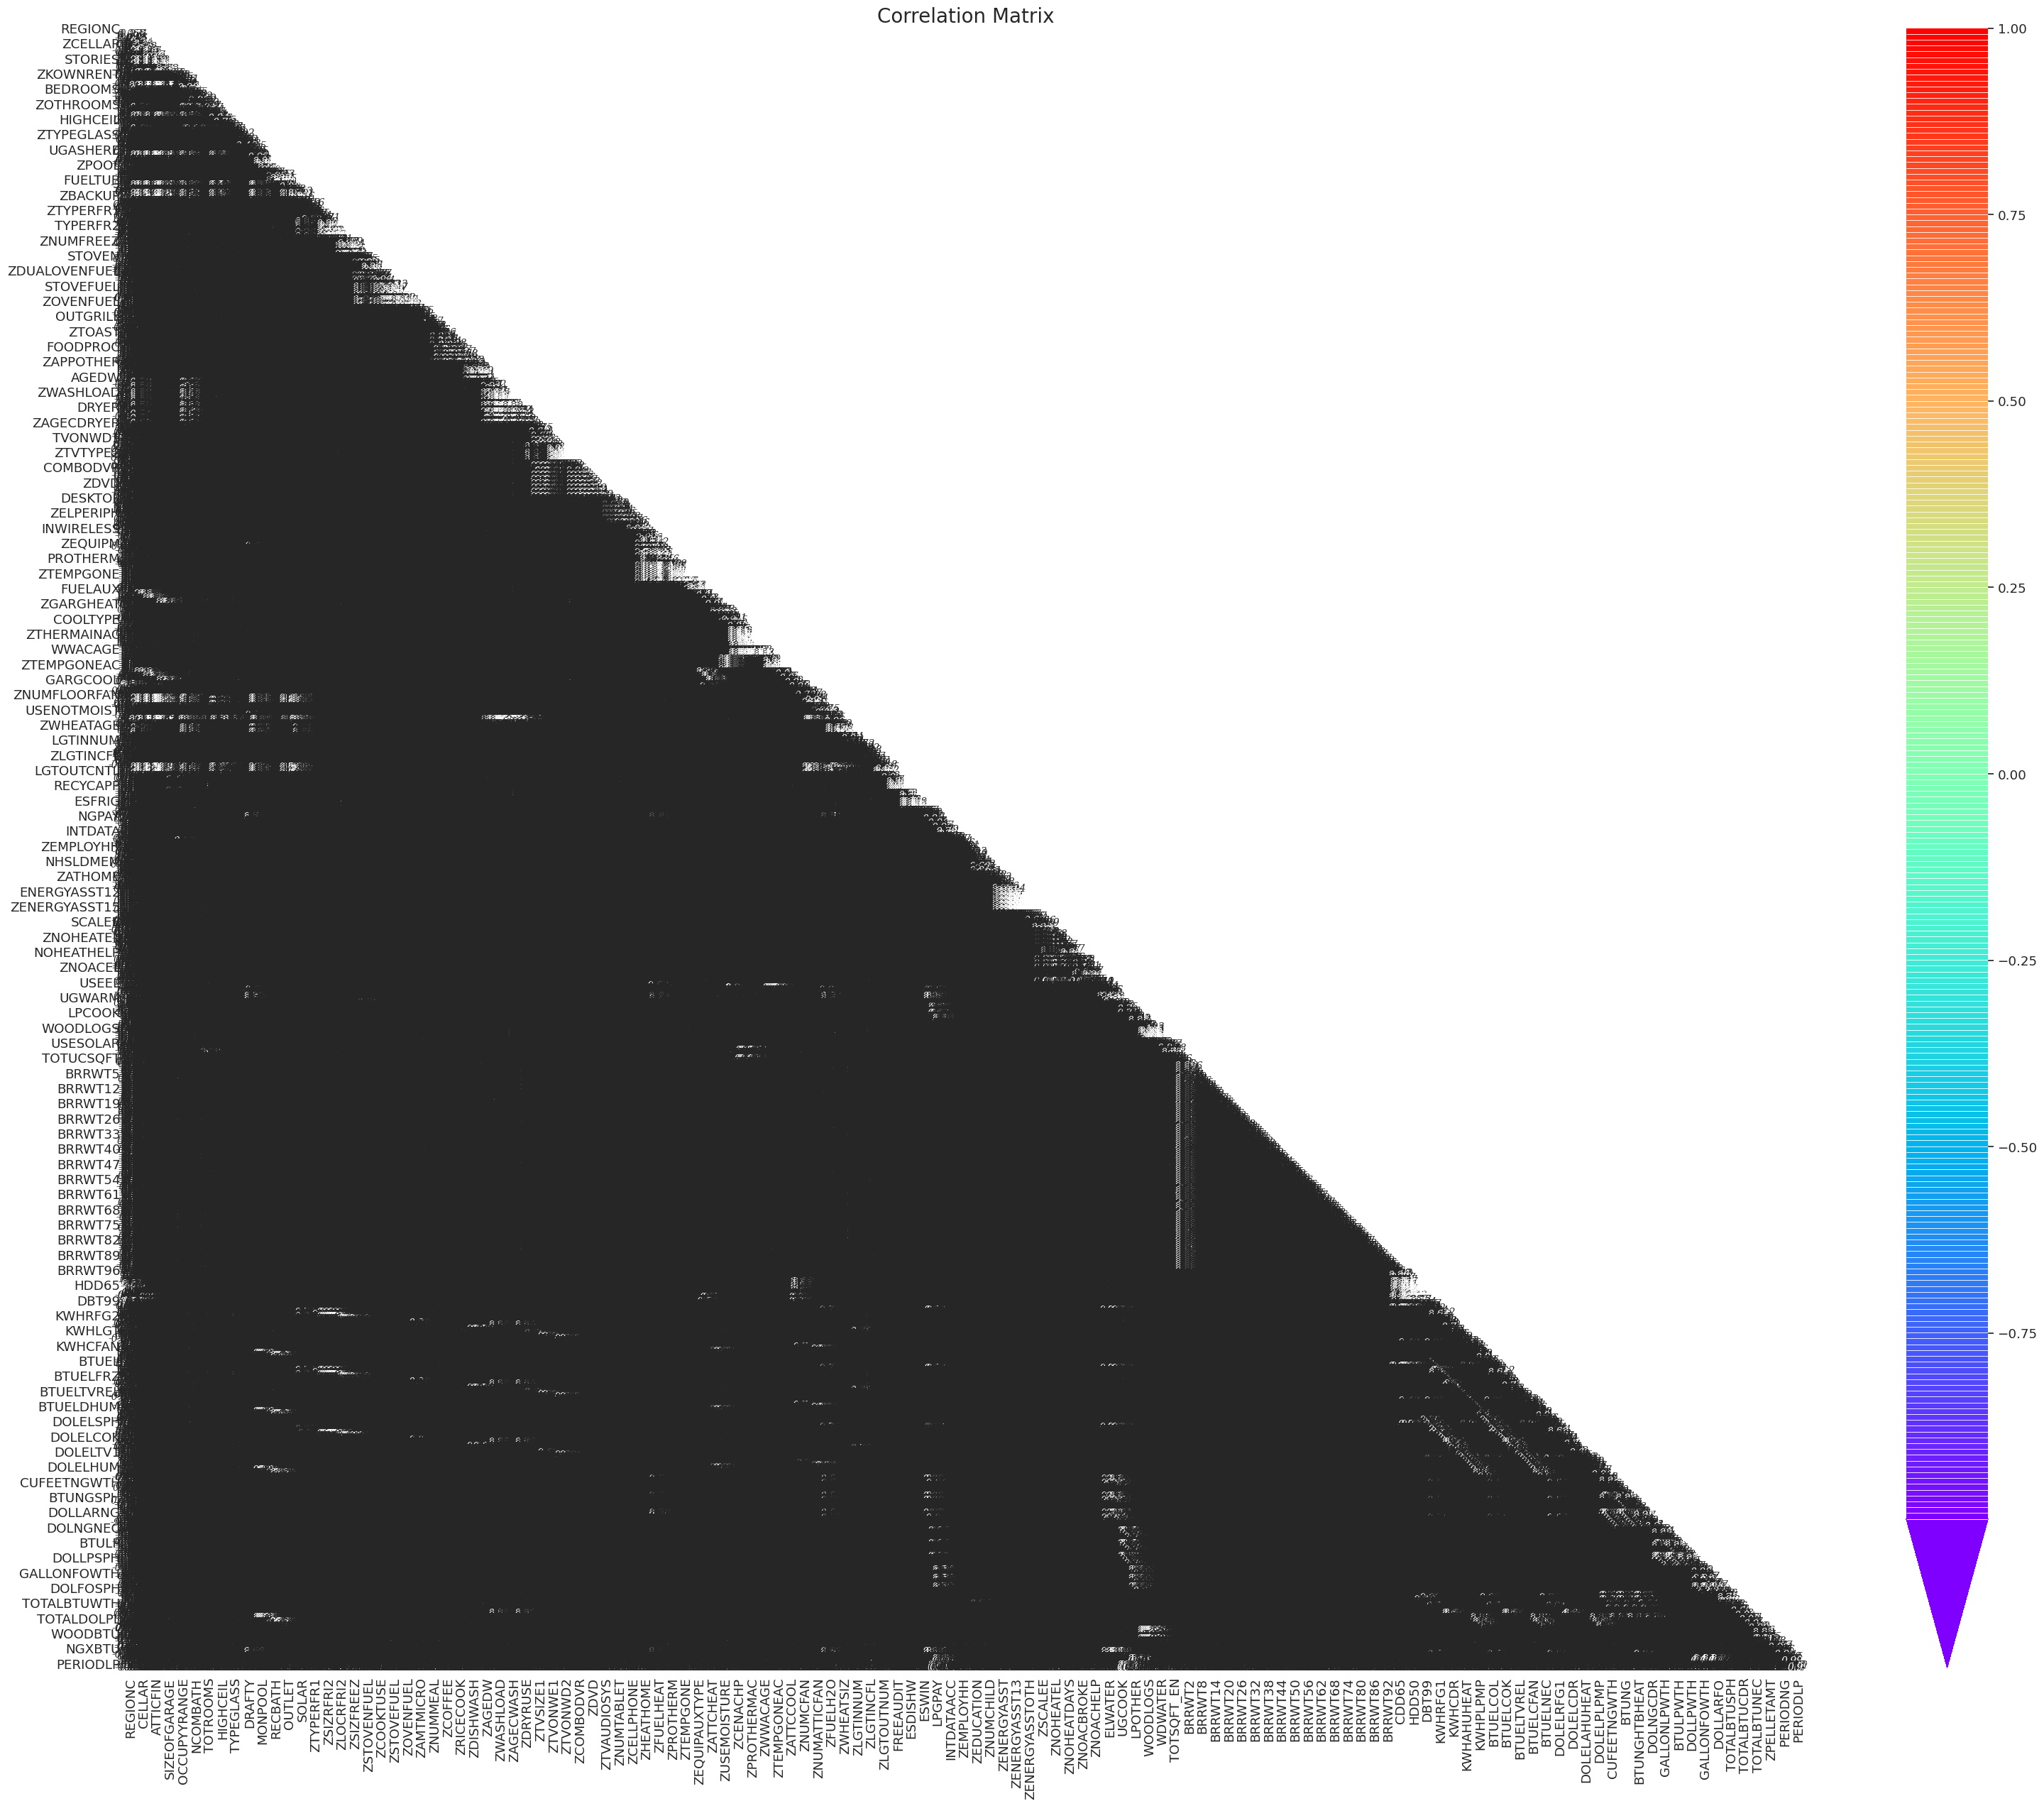

In [51]:
plt.figure(figsize = (38, 30))

# Cutomize the annotation
annot_kws = {'fontsize':10,                     
        'fontstyle':'italic',       
        'fontfamily': 'serif',      
        'alpha':1}                         

# Customize the bar
cbar_kws = {"shrink":1,
        'extend':'min',                    
        'extendfrac':0.1,
        "drawedges":True,
        }

# take upper correlation matrix
matrix = np.triu(df.corr())

# Generate heatmap correlation
ax = sns.heatmap(df.corr(), mask = matrix, cmap = 'rainbow', annot = True, linewidth = 1.5 ,annot_kws= annot_kws, cbar_kws=cbar_kws)

# Set the title etc
plt.title('Correlation Matrix', fontsize = 20)

# Set the size of text
sns.set(font_scale = 1.2)

### => Feature scaling

In [21]:
SS = StandardScaler()
X_train = SS.fit_transform(X_train)
X_test = SS.transform(X_test)

<h2 style="color:#26BBEE  "> <u> Decision Tree Regression </u></h2>

In [22]:
# Initialize the model 
regressor = DecisionTreeRegressor(max_depth=3, random_state = 0)

In [23]:
# Train 
regressor.fit(X_train, y_train);

In [24]:
# Predict 
y_pred = regressor.predict(X_test)
y_pred

array([-2., -2., -2., ..., -2., -2., -2.])

### => Evaluate the Results with common regression metrics 

In [25]:
# R Square
R_Square = r2_score(y_pred, y_test)
print('R Square:', R_Square) 

# Mean Square Error
MSE = mean_squared_error(y_pred, y_test)
print('Mean Squared Error:', MSE)

# Mean Square Error
MAE = mean_absolute_error(y_pred, y_test)
print('Mean Absolute Error:', MAE)

R Square: 1.0
Mean Squared Error: 0.0
Mean Absolute Error: 0.0


In [26]:
text_representation = tree.export_text(regressor)
print(text_representation)

|--- feature_366 <= 1.27
|   |--- value: [-2.00]
|--- feature_366 >  1.27
|   |--- feature_756 <= 3.02
|   |   |--- value: [0.00]
|   |--- feature_756 >  3.02
|   |   |--- value: [1.00]



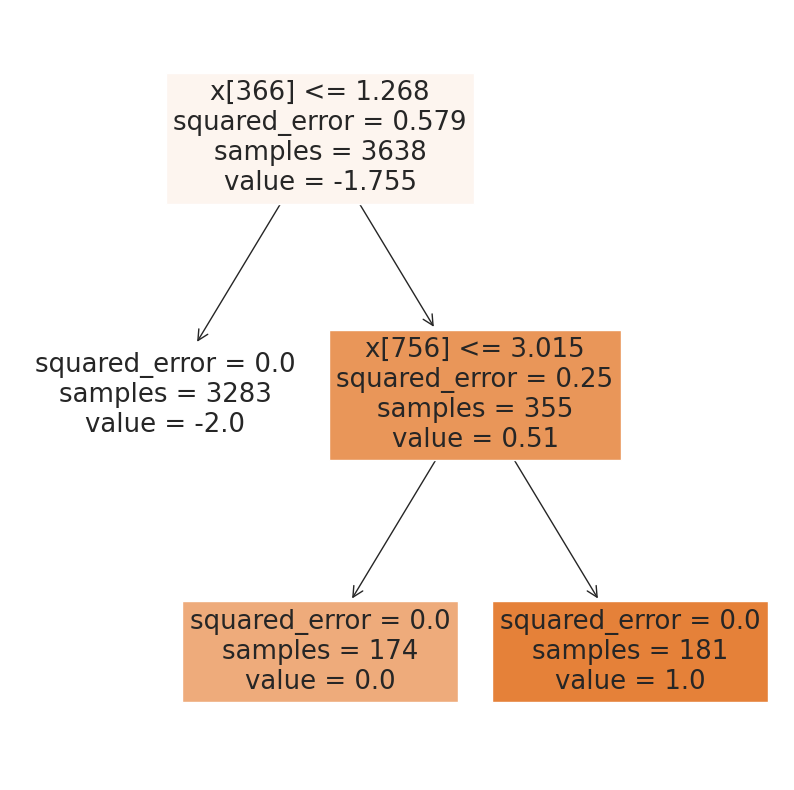

In [27]:
#### Visualize the Tree
fig, ax = plt.subplots(figsize=(10, 10)) 
tree.plot_tree(regressor, filled=True, ax=ax)
plt.show()

### => Display columns name in various way

In [28]:
len(df.columns)

758

In [29]:
""" Cannot show all features """
df.columns

Index(['REGIONC', 'DIVISION', 'METROMICRO', 'UATYP10', 'TYPEHUQ', 'ZTYPEHUQ',
       'CELLAR', 'ZCELLAR', 'BASEFIN', 'ZBASEFIN',
       ...
       'ZELAMOUNT', 'NGXBTU', 'PERIODNG', 'ZNGAMOUNT', 'FOXBTU', 'PERIODFO',
       'ZFOAMOUNT', 'LPXBTU', 'PERIODLP', 'ZLPAMOUNT'],
      dtype='object', length=758)

In [30]:
# Nothing changes!
columns = df.columns 
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')
print(columns)

Index(['REGIONC', 'DIVISION', 'METROMICRO', 'UATYP10', 'TYPEHUQ', 'ZTYPEHUQ',
       'CELLAR', 'ZCELLAR', 'BASEFIN', 'ZBASEFIN',
       ...
       'ZELAMOUNT', 'NGXBTU', 'PERIODNG', 'ZNGAMOUNT', 'FOXBTU', 'PERIODFO',
       'ZFOAMOUNT', 'LPXBTU', 'PERIODLP', 'ZLPAMOUNT'],
      dtype='object', length=758)


In [31]:
""" This is not working either 

contextmanager example instead of do:
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
or
    pd.options.display.max_rows
    pd.options.display.max_columns
or
    with pd.option_context("display.max_rows", None, "display.max_columns", None):
    
In any case, print(df.columns) it is not affected by the options => just print the first row to get the columns
"""
@contextmanager
def set_options():
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    yield
    pd.reset_option('display.max_rows') 
    pd.reset_option('display.max_columns')

with set_options():
    print(df[:1])

   REGIONC  DIVISION  METROMICRO  UATYP10  TYPEHUQ  ZTYPEHUQ  CELLAR  ZCELLAR  \
0        4        10           0        2        2         0       0        0   

   BASEFIN  ZBASEFIN  ATTIC  ZATTIC  ATTICFIN  ZATTICFIN  STORIES  ZSTORIES  \
0       -2        -2      0       0        -2         -2       20         0   

   PRKGPLC1  ZPRKGPLC1  SIZEOFGARAGE  ZSIZEOFGARAGE  KOWNRENT  ZKOWNRENT  \
0         1          0             2              0         1          0   

   YEARMADERANGE  ZYEARMADERANGE  OCCUPYYRANGE  ZOCCUPYYRANGE  STUDIO  \
0              7               0             8              0      -2   

   ZSTUDIO  BEDROOMS  ZBEDROOMS  NCOMBATH  ZNCOMBATH  NHAFBATH  ZNHAFBATH  \
0       -2         3          0         2          0         1          0   

   OTHROOMS  ZOTHROOMS  TOTROOMS  ZTOTROOMS  WALLTYPE  ZWALLTYPE  ROOFTYPE  \
0         4          0         7          0         4          0         1   

   ZROOFTYPE  HIGHCEIL  ZHIGHCEIL  DOOR1SUM  ZDOOR1SUM  WINDOWS  Z

In [32]:
# Easy way 1 
list(df.columns)

['REGIONC',
 'DIVISION',
 'METROMICRO',
 'UATYP10',
 'TYPEHUQ',
 'ZTYPEHUQ',
 'CELLAR',
 'ZCELLAR',
 'BASEFIN',
 'ZBASEFIN',
 'ATTIC',
 'ZATTIC',
 'ATTICFIN',
 'ZATTICFIN',
 'STORIES',
 'ZSTORIES',
 'PRKGPLC1',
 'ZPRKGPLC1',
 'SIZEOFGARAGE',
 'ZSIZEOFGARAGE',
 'KOWNRENT',
 'ZKOWNRENT',
 'YEARMADERANGE',
 'ZYEARMADERANGE',
 'OCCUPYYRANGE',
 'ZOCCUPYYRANGE',
 'STUDIO',
 'ZSTUDIO',
 'BEDROOMS',
 'ZBEDROOMS',
 'NCOMBATH',
 'ZNCOMBATH',
 'NHAFBATH',
 'ZNHAFBATH',
 'OTHROOMS',
 'ZOTHROOMS',
 'TOTROOMS',
 'ZTOTROOMS',
 'WALLTYPE',
 'ZWALLTYPE',
 'ROOFTYPE',
 'ZROOFTYPE',
 'HIGHCEIL',
 'ZHIGHCEIL',
 'DOOR1SUM',
 'ZDOOR1SUM',
 'WINDOWS',
 'ZWINDOWS',
 'TYPEGLASS',
 'ZTYPEGLASS',
 'WINFRAME',
 'ZWINFRAME',
 'ADQINSUL',
 'ZADQINSUL',
 'DRAFTY',
 'ZDRAFTY',
 'UGASHERE',
 'ZUGASHERE',
 'SWIMPOOL',
 'ZSWIMPOOL',
 'MONPOOL',
 'ZMONPOOL',
 'POOL',
 'ZPOOL',
 'FUELPOOL',
 'ZFUELPOOL',
 'RECBATH',
 'ZRECBATH',
 'MONTUB',
 'ZMONTUB',
 'FUELTUB',
 'ZFUELTUB',
 'OUTLET',
 'ZOUTLET',
 'ALTFUELPEV',
 'ZALTFU

In [33]:
# Easy way 2
for i in df.columns.tolist():
    print(i)

REGIONC
DIVISION
METROMICRO
UATYP10
TYPEHUQ
ZTYPEHUQ
CELLAR
ZCELLAR
BASEFIN
ZBASEFIN
ATTIC
ZATTIC
ATTICFIN
ZATTICFIN
STORIES
ZSTORIES
PRKGPLC1
ZPRKGPLC1
SIZEOFGARAGE
ZSIZEOFGARAGE
KOWNRENT
ZKOWNRENT
YEARMADERANGE
ZYEARMADERANGE
OCCUPYYRANGE
ZOCCUPYYRANGE
STUDIO
ZSTUDIO
BEDROOMS
ZBEDROOMS
NCOMBATH
ZNCOMBATH
NHAFBATH
ZNHAFBATH
OTHROOMS
ZOTHROOMS
TOTROOMS
ZTOTROOMS
WALLTYPE
ZWALLTYPE
ROOFTYPE
ZROOFTYPE
HIGHCEIL
ZHIGHCEIL
DOOR1SUM
ZDOOR1SUM
WINDOWS
ZWINDOWS
TYPEGLASS
ZTYPEGLASS
WINFRAME
ZWINFRAME
ADQINSUL
ZADQINSUL
DRAFTY
ZDRAFTY
UGASHERE
ZUGASHERE
SWIMPOOL
ZSWIMPOOL
MONPOOL
ZMONPOOL
POOL
ZPOOL
FUELPOOL
ZFUELPOOL
RECBATH
ZRECBATH
MONTUB
ZMONTUB
FUELTUB
ZFUELTUB
OUTLET
ZOUTLET
ALTFUELPEV
ZALTFUELPEV
BACKUP
ZBACKUP
SOLAR
NUMFRIG
ZNUMFRIG
SIZRFRI1
ZSIZRFRI1
TYPERFR1
ZTYPERFR1
AGERFRI1
ZAGERFRI1
ICE
ZICE
SIZRFRI2
ZSIZRFRI2
TYPERFR2
ZTYPERFR2
AGERFRI2
ZAGERFRI2
LOCRFRI2
ZLOCRFRI2
NUMFREEZ
ZNUMFREEZ
UPRTFRZR
ZUPRTFRZR
SIZFREEZ
ZSIZFREEZ
AGEFRZR
ZAGEFRZR
STOVEN
ZSTOVEN
STOVENFUEL
ZSTOVENFUEL
DUAL

### => Predict a single sample

In [34]:
""" Create the sample with values => mix of new and identical ones. """
listone_cols = []

random_row = df.sample(n=1)
modified_row = random_row.copy()

# Columns to modify
cols_to_modify = random.sample(range(df.shape[1]), 450)
# Loop through columns by index  
for i in cols_to_modify:
    column_extracted_to_change = df.columns[i]
    #print(column_extracted_to_change)
    listone_cols.append(column_extracted_to_change)
    # Modify value
    value = modified_row.iloc[0,i] 
    modified_row.iloc[0,i] = value + random.normalvariate(0,0.1)

In [35]:
X_partial = modified_row[listone_cols]
print(type(X_partial))
X_partial

<class 'pandas.core.frame.DataFrame'>


,NHSLDMEM,EDUCATION,CUFEETNGPLHEAT,DOLELRFG1,GNDHDD65,ZHEATHOME,BLENDER,ZEDUCATION,INTERNET,BTUNGPLHEAT,...,ZLGTOUTNUM,ZSCALEG,TOASTOVN,ENERGYASST13,ZTVONWD1,CLIMATE_REGION_PUB,BRRWT7,PAYHELP,ZFUELH2O2,BTUELAHUHEAT
3590,1.017735,3.906257,-0.026198,55.263729,513.101933,-0.257587,-0.104369,0.0514,0.95424,0.10905,...,-2.02071,0.096884,-0.07324,-1.905825,-0.078618,0.904979,16470.308112,-2.050307,-1.963937,41.033217


In [36]:
len(X.columns)

757

In [37]:
random_row = df.sample(n=1)
random_row

,REGIONC,DIVISION,METROMICRO,UATYP10,TYPEHUQ,ZTYPEHUQ,CELLAR,ZCELLAR,BASEFIN,ZBASEFIN,...,ZELAMOUNT,NGXBTU,PERIODNG,ZNGAMOUNT,FOXBTU,PERIODFO,ZFOAMOUNT,LPXBTU,PERIODLP,ZLPAMOUNT
404,4,9,0,2,2,0,0,0,-2,-2,...,0,100.088868,-2,-2,137.45,-2,-2,91.33,-2,-2


In [38]:
shared_cols = X_partial.columns

df3 = pd.DataFrame(columns=X.columns)

In [39]:
df3.head()

,REGIONC,DIVISION,METROMICRO,UATYP10,TYPEHUQ,ZTYPEHUQ,CELLAR,ZCELLAR,BASEFIN,ZBASEFIN,...,PERIODEL,ZELAMOUNT,NGXBTU,PERIODNG,ZNGAMOUNT,FOXBTU,PERIODFO,ZFOAMOUNT,LPXBTU,PERIODLP


In [40]:
# Assign values from X_partial
for col in shared_cols:
    df3[col] = X_partial[col]

/tmp/ipykernel_1151656/2248508439.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df3[col] = X_partial[col]


In [41]:
df3.head()

,REGIONC,DIVISION,METROMICRO,UATYP10,TYPEHUQ,ZTYPEHUQ,CELLAR,ZCELLAR,BASEFIN,ZBASEFIN,...,ZELAMOUNT,NGXBTU,PERIODNG,ZNGAMOUNT,FOXBTU,PERIODFO,ZFOAMOUNT,LPXBTU,PERIODLP,ZLPAMOUNT
3590,3.906412,8.986024,0.103731,NaN,NaN,-0.188164,-1.926762,NaN,-1.983706,NaN,...,NaN,NaN,-1.943873,NaN,137.5196,NaN,-1.890651,NaN,NaN,-2.114424


In [42]:
# Fill shared columns  
non_shared_cols = [col for col in X.columns if col not in shared_cols]
non_shared_cols[:4]

['UATYP10', 'TYPEHUQ', 'ZCELLAR', 'ZBASEFIN']

In [43]:
# Fill non-shared columns  
for col in non_shared_cols:
    df3[col] = random_row[col]

df3.head()

,REGIONC,DIVISION,METROMICRO,UATYP10,TYPEHUQ,ZTYPEHUQ,CELLAR,ZCELLAR,BASEFIN,ZBASEFIN,...,ZELAMOUNT,NGXBTU,PERIODNG,ZNGAMOUNT,FOXBTU,PERIODFO,ZFOAMOUNT,LPXBTU,PERIODLP,ZLPAMOUNT
3590,3.906412,8.986024,0.103731,NaN,NaN,-0.188164,-1.926762,NaN,-1.983706,NaN,...,NaN,NaN,-1.943873,NaN,137.5196,NaN,-1.890651,NaN,NaN,-2.114424


In [44]:
# # Iterate and assign each non-shared column  
for col2 in non_shared_cols:
    df3[col2] = X[col2]

In [48]:
df3 = df3[df3.columns[:-1]]


In [49]:
df3.head()

,REGIONC,DIVISION,METROMICRO,UATYP10,TYPEHUQ,ZTYPEHUQ,CELLAR,ZCELLAR,BASEFIN,ZBASEFIN,...,PERIODEL,ZELAMOUNT,NGXBTU,PERIODNG,ZNGAMOUNT,FOXBTU,PERIODFO,ZFOAMOUNT,LPXBTU,PERIODLP
3590,3.906412,8.986024,0.103731,2,5,-0.188164,-1.926762,-2,-1.983706,-2,...,1.04959,0,100.088868,-1.943873,-2,137.5196,-2,-1.890651,91.33,-2


In [50]:
""" Remove feature names from df3 before predicting, creates a NumPy array from 0 to n-1 to replace the real column names.
This is necessary to avoid the warning 'UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names.'
"""
df3.columns = np.arange(len(df3.columns))
prediction = regressor.predict(df3)
prediction

array([-2.])